In [9]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ZADANIE 1

In [2]:
df_pd = pd.read_html('https://www.tiobe.com/tiobe-index/')
df_pd = df_pd[0]
df_pd.drop(df_pd[['Programming Language', 'Change']], axis=1, inplace=True)
df = pl.from_pandas(df_pd)
df.head()


Nov 2025,Nov 2024,Programming Language.1,Ratings,Change.1
i64,i64,str,str,str
1,1,"""Python""","""23.37%""","""+0.52%"""
2,4,"""C""","""9.68%""","""+0.67%"""
3,2,"""C++""","""8.95%""","""-1.69%"""
4,3,"""Java""","""8.54%""","""-1.06%"""
5,5,"""C#""","""7.65%""","""+2.67%"""


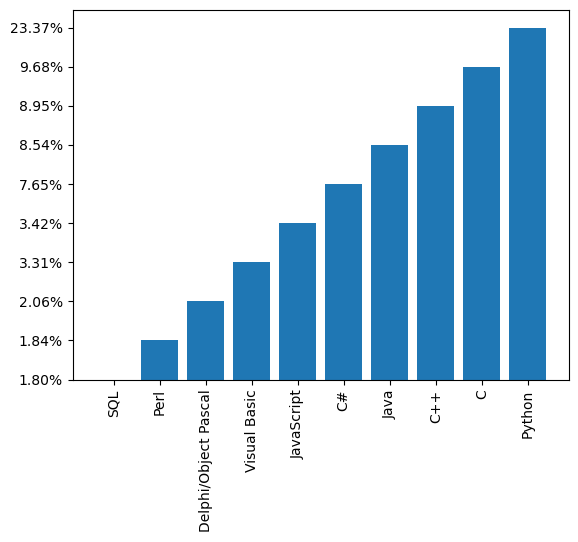

Najwiekszy awans: C#
Najwiekszy spadek: C++


In [3]:
top10 = df.head(10)
top10 = top10.reverse()
dataX = top10.select("Programming Language.1").transpose().rows()[0]
dataY = top10.select("Ratings").transpose().rows()[0]

plt.bar(range(len(dataX)), dataY)

plt.xticks(range(len(dataX)), dataX, rotation=90)
plt.show()

df = df.with_columns(
    pl.col("Change.1").cast(pl.Utf8).str.replace("%", "").cast(pl.Float64),
)
max_improve = df.sort("Change.1", descending=True).select("Programming Language.1", "Change.1").row(0)
max_drop = df.sort("Change.1", descending=False).select("Programming Language.1", "Change.1").row(0)
print(f"Najwiekszy awans: {max_improve[0]}")
print(f"Najwiekszy spadek: {max_drop[0]}")

ZADANIE 2

In [20]:
df = pl.read_excel('data/wynagrodzenia.xlsx', sheet_name = 'TABLICA')
df.columns = ['Kod', 'Nazwa', 'ogolem_2021', 'ogolem_2022', 'przecietne 2021', 'przecietne_2022']
df = df.slice(2)
df = df.with_columns(pl.col('ogolem_2021').cast(pl.Float64),
                pl.col('ogolem_2022').cast(pl.Float64),
                pl.col('przecietne 2021').cast(pl.Float64),
                pl.col('przecietne_2022').cast(pl.Float64))

df = df.sort(pl.col('ogolem_2022'), descending=True)
df.head()
top5 = df.head(5)
min5 = df.tail(5)
print(top5, min5)

shape: (5, 6)
┌─────────┬────────────────────┬─────────────┬─────────────┬─────────────────┬─────────────────┐
│ Kod     ┆ Nazwa              ┆ ogolem_2021 ┆ ogolem_2022 ┆ przecietne 2021 ┆ przecietne_2022 │
│ ---     ┆ ---                ┆ ---         ┆ ---         ┆ ---             ┆ ---             │
│ str     ┆ str                ┆ f64         ┆ f64         ┆ f64             ┆ f64             │
╞═════════╪════════════════════╪═════════════╪═════════════╪═════════════════╪═════════════════╡
│ 2469000 ┆ Powiat m. Katowice ┆ 6924.74     ┆ 8017.49     ┆ 115.4           ┆ 119.6           │
│ 2468000 ┆ Powiat m. Jaworzno ┆ 6435.97     ┆ 7568.06     ┆ 107.2           ┆ 112.9           │
│ 2466000 ┆ Powiat m. Gliwice  ┆ 6698.45     ┆ 7469.7      ┆ 111.6           ┆ 111.4           │
│ 2465000 ┆ Powiat m. Dąbrowa  ┆ 6360.81     ┆ 7271.87     ┆ 106.0           ┆ 108.4           │
│         ┆ Górnicza           ┆             ┆             ┆                 ┆                 │
│ 2411000 ┆ Powi